###### Data Set Information:

-We perform energy analysis using 12 different building 
shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [32]:
e_data=pd.read_excel("ENB2012_data.xlsx")

In [33]:
e_data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [34]:
# Relative Compactness: This value is obtained by the sum of all surfaces of its envelope, divided by its gross heated volume.
# Glazing Area: It describe any of the glazed elements in a building.

#Relative Compactness
#Surface Area - m²
#Wall Area - m²
#Roof Area - m²
#Overall Height - m
#Orientation - 2:North, 3:East, 4:South, 5:West
#Glazing Area - 0%, 10%, 25%, 40% (of floor area)
#Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
#Heating Load - kWh/m²
#Cooling Load - kWh/m²
#Source: https://rstudio-pubs-static.s3.amazonaws.com/244473_5d13955ea0fd4e5e9d376161b956e9dc.html


In [35]:
e_data.rename(columns={"X1": "Relative Compactness","X2": "Surface Area","X3":"Wall Area","X4":"Roof Area","X5": "Overall Height","X6": "Orientation","X7": "Glazing Area","X8": "Glazing Area Distribution","Y1":"Heating Load","Y2": "Cooling Load"},inplace=True)

In [36]:
e_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [37]:
e_data.drop(["Unnamed: 10","Unnamed: 11"],axis=1,inplace=True)
e_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [66]:
profile=ProfileReport(e_data,title="Pandas Profile Report",explorative=True)

In [39]:
profile.to_widgets()
#profile.to_file("output.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
e_data.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [41]:
e_data.describe(include="all")

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#### Observations:
   - since Mean for CL& HL > Median, it is +vly scewed distribution
   - MAX SA: 808m2
   - Max RA: 220m2
   - Max WA: 416m2

In [42]:
e_data.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

# Categorical data:
- Overall Height  
- Orientation
- Glazing Area
- Glazing Area Distribution 
- Roof Area

In [43]:
e_data.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

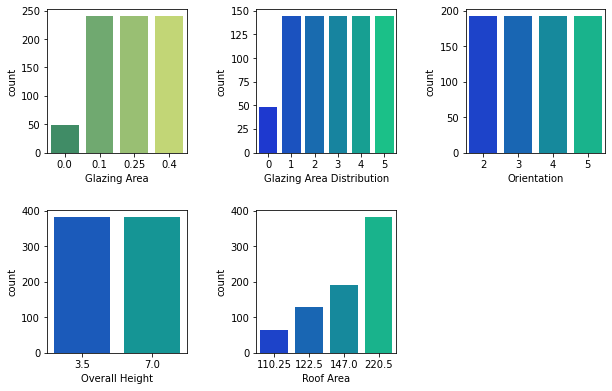

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(e_data["Glazing Area"],palette="summer")

plt.subplot(3,3,2)
sns.countplot(e_data["Glazing Area Distribution"],palette="winter")

plt.subplot(3,3,3)
sns.countplot(e_data["Orientation"],palette="winter")

plt.subplot(3,3,4)
sns.countplot(e_data["Overall Height"],palette="winter")

plt.subplot(3,3,5)
sns.countplot(e_data["Roof Area"],palette="winter")

plt.subplots_adjust(hspace=0.4,wspace=0.5)

### Observations

- there are less builidings with no glazing Areas then others (which are equally distributed)
- Orientation is equally distributed to all buildings
- Overall Height is equally distributed
- there are more buildings with higer roof areas

# Statistcal Test

In [45]:
#Shapiro-Wilk Normality Test
# Interpretation

# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.
from scipy.stats import shapiro

In [46]:
stat, p=shapiro(e_data["Cooling Load"])
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Probably not Gaussian


<AxesSubplot:xlabel='Cooling Load', ylabel='Density'>

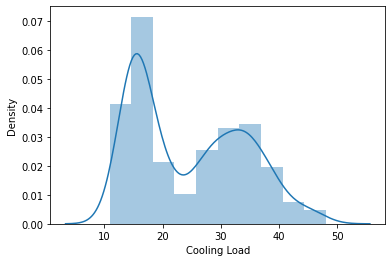

In [47]:
sns.distplot(e_data["Cooling Load"])

#### Chi-Squared Test
-Tests whether two categorical variables are related or independent.

#Overall Height
#Orientation
#Glazing Area
#Glazing Area Distribution
#Roof Area

In [48]:
from scipy.stats import chi2_contingency

#### e_data["Overall Height"],e_data["Orientation"]

In [49]:
stat, p, dof, expected =chi2_contingency(pd.crosstab(e_data["Overall Height"],e_data["Orientation"]))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably independent


#### e_data["Glazing Area"],e_data["Roof Area"]

In [50]:
stat, p, dof, expected =chi2_contingency(pd.crosstab(e_data["Glazing Area"],e_data["Roof Area"]))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably independent


#### e_data["Glazing Area"],e_data["Orientation"]

In [73]:
stat, p, dof, expected =chi2_contingency(pd.crosstab(e_data["Glazing Area"],e_data["Orientation"]))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably independent


#### e_data["Glazing Area"],e_data["Glazing Area Distribution"]

In [52]:
stat, p, dof, expected =chi2_contingency(pd.crosstab(e_data["Glazing Area"],e_data["Glazing Area Distribution"]))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably dependent


### Glazing is related with distribution, we can consider glazing area only for further study

#### pd.crosstab(e_data["Overall Height"],e_data["Roof Area"])

In [74]:
stat, p, dof, expected =chi2_contingency(pd.crosstab(e_data["Roof Area"],e_data["Overall Height"]))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably dependent


### Overal height  is related with Roof area

# EDA

In [53]:
e_data_num=e_data[["Relative Compactness","Surface Area","Wall Area","Roof Area","Heating Load","Cooling Load"]]

<AxesSubplot:>

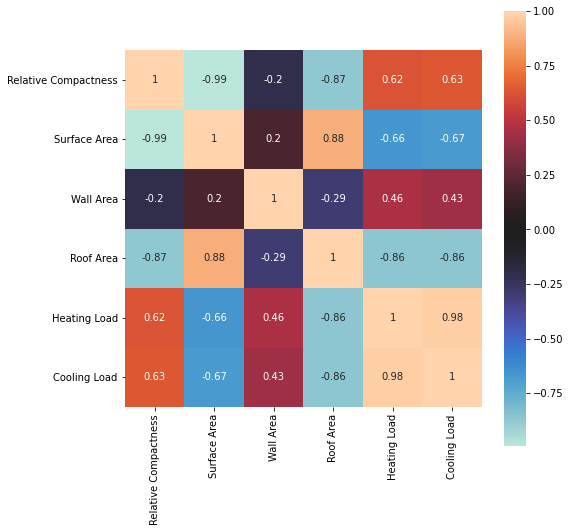

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(e_data_num.corr(),center=0,square=True,annot=True)

### Heat Map Observations
- **RC** has strong -ve correlation with **Surface area** and strong -ve correalation with **Roof Area**
- **Surface Area** is having a strong +ve corr with **Roof area**.
- **Roof area** is strong -ve corr with **HL and CL**
- **HL and CL** are having +ve corr with RC and a strong one **within each other.**

### - Since Heating and cooling load are strongly correlated we can work out our analyssis only on CL against all the parameters.
- We can also remove relative compactness as it is strong -ve correlation with surface area

In [55]:
e_data.drop("Relative Compactness",axis=1,inplace=True)

### Relational Plots

<Figure size 720x720 with 0 Axes>

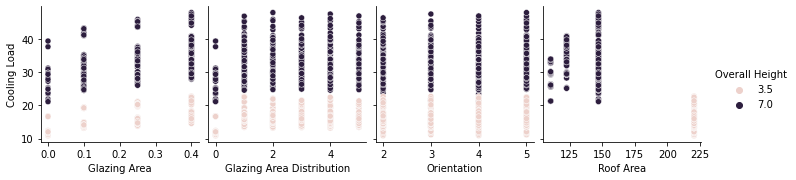

In [56]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=["Glazing Area","Glazing Area Distribution","Orientation","Roof Area"],y_vars="Cooling Load",data=e_data,hue="Overall Height")

### Observation:
- CL incrases with increase in Glazing area
- CL is low for uniform GAD
- Orienntation has no effect of CL
- Low height results in low CL
- Smaller buildings have only 1 RA= 220m2

In [57]:
e_data.sort_values("Surface Area")

,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,514.5,294.0,110.25,7.0,2,0.00,0,15.55,21.33
483,514.5,294.0,110.25,7.0,5,0.25,5,28.61,30.20
146,514.5,294.0,110.25,7.0,4,0.10,3,24.11,25.84
145,514.5,294.0,110.25,7.0,3,0.10,3,24.40,26.02
144,514.5,294.0,110.25,7.0,2,0.10,3,24.28,25.68
...,...,...,...,...,...,...,...,...,...
766,808.5,367.5,220.50,3.5,4,0.40,5,16.48,16.61
382,808.5,367.5,220.50,3.5,4,0.25,2,14.60,15.14
381,808.5,367.5,220.50,3.5,3,0.25,2,14.66,15.64
335,808.5,367.5,220.50,3.5,5,0.25,1,15.16,15.76


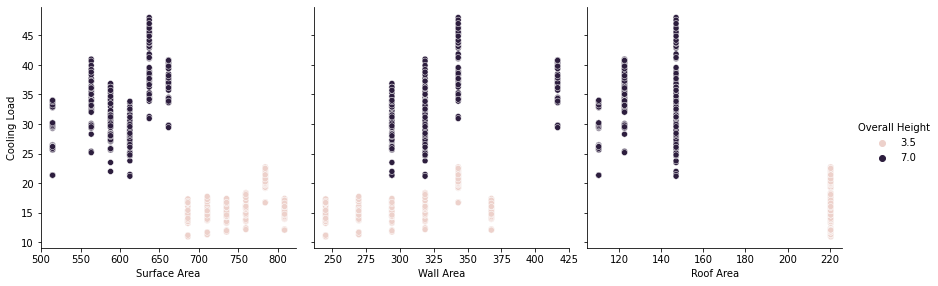

In [58]:
sns.pairplot(x_vars=["Surface Area","Wall Area","Roof Area"],y_vars=["Cooling Load"],data=e_data,hue="Overall Height",height=4)

### Observations:
    - Roof area and Surface area range is high for minimum/ lowest (3.5) over-all height and
    - Roof area and Surface area range is low for maximum/ highest (7.0) over-all height.
   

## We have seen more variation in load data when the overall height is (7.0). So lets create a subset named  which contains the filtered data with overall height = 7.0.

In [59]:
df_7=e_data.loc[e_data["Overall Height"]==7.0,:]

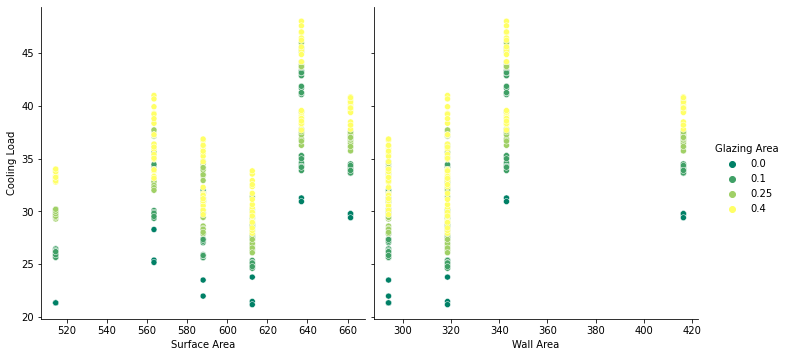

In [60]:
sns.pairplot(x_vars=["Surface Area","Wall Area"],y_vars=["Cooling Load"],data=df_7,hue="Glazing Area",height=5,palette="summer")

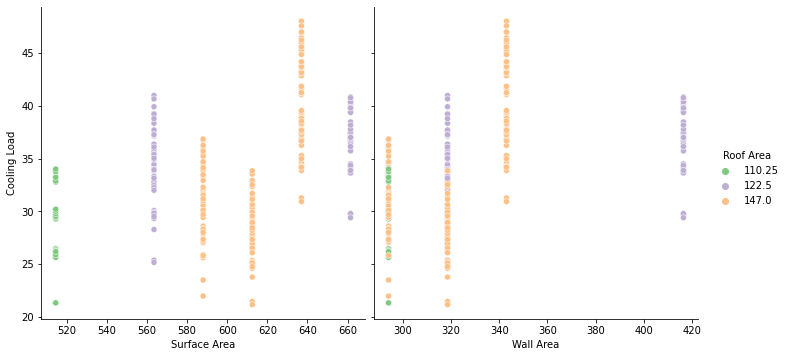

In [61]:
sns.pairplot(x_vars=["Surface Area","Wall Area"],y_vars=["Cooling Load"],data=df_7,hue="Roof Area",height=5,palette="Accent")

### Increase in GA leads to Increase in CL irrespective of other parameters

### Maximum Cooling load is found at highest Roof area, highest  but not at highest WA or SA
**CL and SA**
- Cooling load highest for the SA of 650m2.
- **Based on the pattern, We cannot predict that there is relation between CL and SA**


**CL and WA**
- <span style="color:red">biggest RA has the largest CL
- Why at 320m2 WA, CL is higher for smaller RA (122m2) then 147m2?
 - we cannot say CL increases with increase in RA

# Box plots anlysis

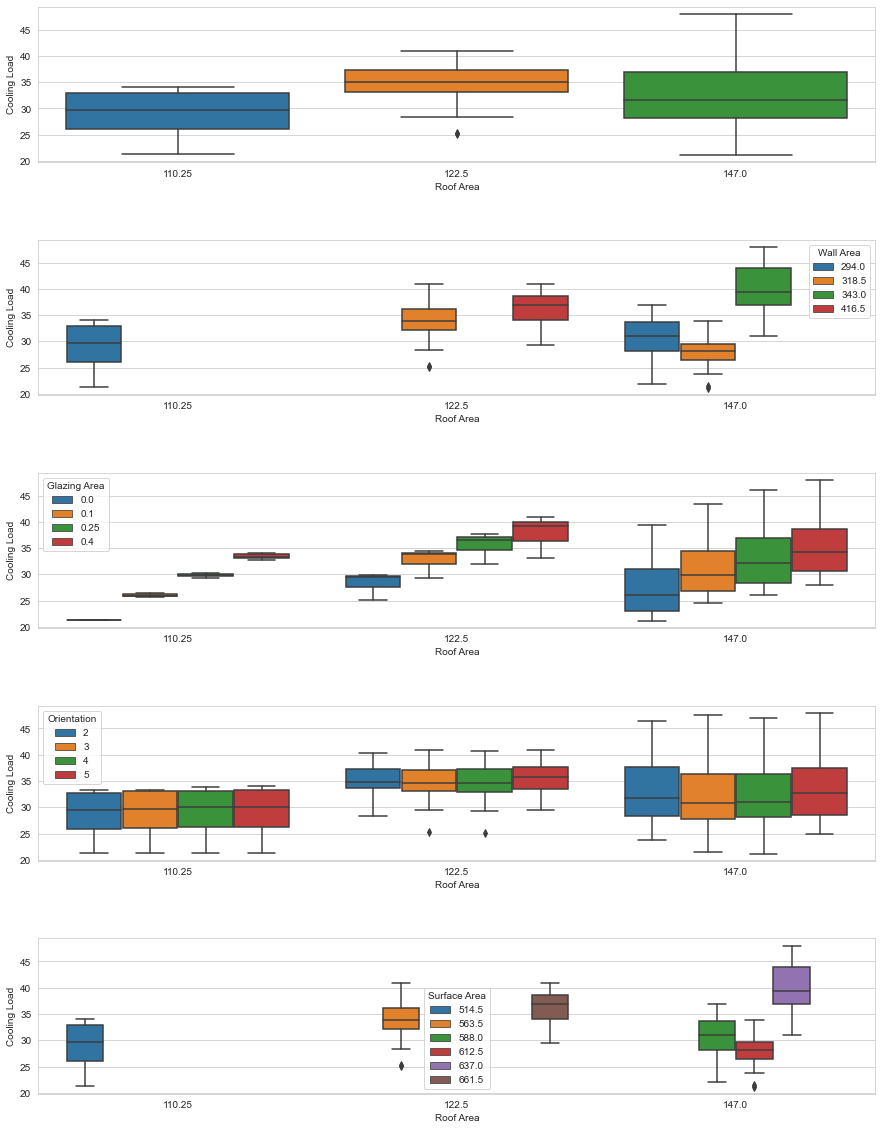

In [62]:
#plotting Roof area v/s CL for different WA, GA, Orientation,SA

sns.set_style("whitegrid")
plt.figure(figsize=(15,20))
plt.subplot(5,1,1)
sns.boxplot(x="Roof Area",y="Cooling Load",data=df_7)


plt.subplot(5,1,2)
sns.boxplot(x="Roof Area",y="Cooling Load",data=df_7,hue="Wall Area")

plt.subplot(5,1,3)
sns.boxplot(x="Roof Area",y="Cooling Load",data=df_7,hue="Glazing Area")

plt.subplot(5,1,4)
sns.boxplot(x="Roof Area",y="Cooling Load",data=df_7,hue="Orientation")

plt.subplot(5,1,5)
sns.boxplot(x="Roof Area",y="Cooling Load",data=df_7,hue="Surface Area")

plt.subplots_adjust(hspace=0.5)


Observation from the box plot:
- for RA: 122.5 m2 we get the highst median load, highst values obtained at maximum RA=147m2
- @ Max RA is associated with low WA values hence the load is low for highestest RA,
- for a given RA orientation plays no significant role
- Surface area has no particular realtin with CL for a particular RA

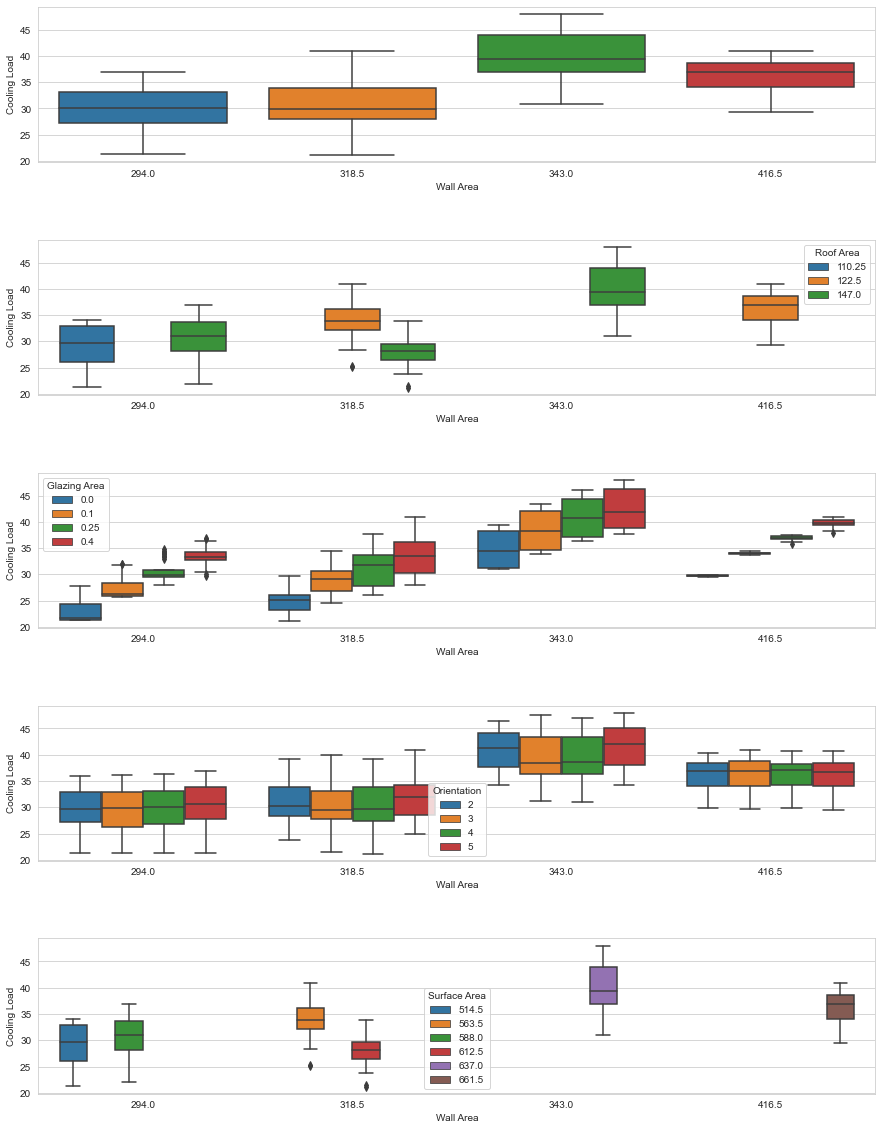

In [63]:
#plotting Wall area v/s CL for different RA, SA, GA, Orientation 

sns.set_style("whitegrid")
plt.figure(figsize=(15,20))
plt.subplot(5,1,1)
sns.boxplot(x="Wall Area",y="Cooling Load",data=df_7)


plt.subplot(5,1,2)
sns.boxplot(x="Wall Area",y="Cooling Load",data=df_7,hue="Roof Area")

plt.subplot(5,1,3)
sns.boxplot(x="Wall Area",y="Cooling Load",data=df_7,hue="Glazing Area")

plt.subplot(5,1,4)
sns.boxplot(x="Wall Area",y="Cooling Load",data=df_7,hue="Orientation")

plt.subplot(5,1,5)
sns.boxplot(x="Wall Area",y="Cooling Load",data=df_7,hue="Surface Area")

plt.subplots_adjust(hspace=0.5)

#### Observation from the box plot:
- CL is highest for WA=343m2 as it is supported by highest RA (147m2)
- for a giben WA orientation plays no significant role


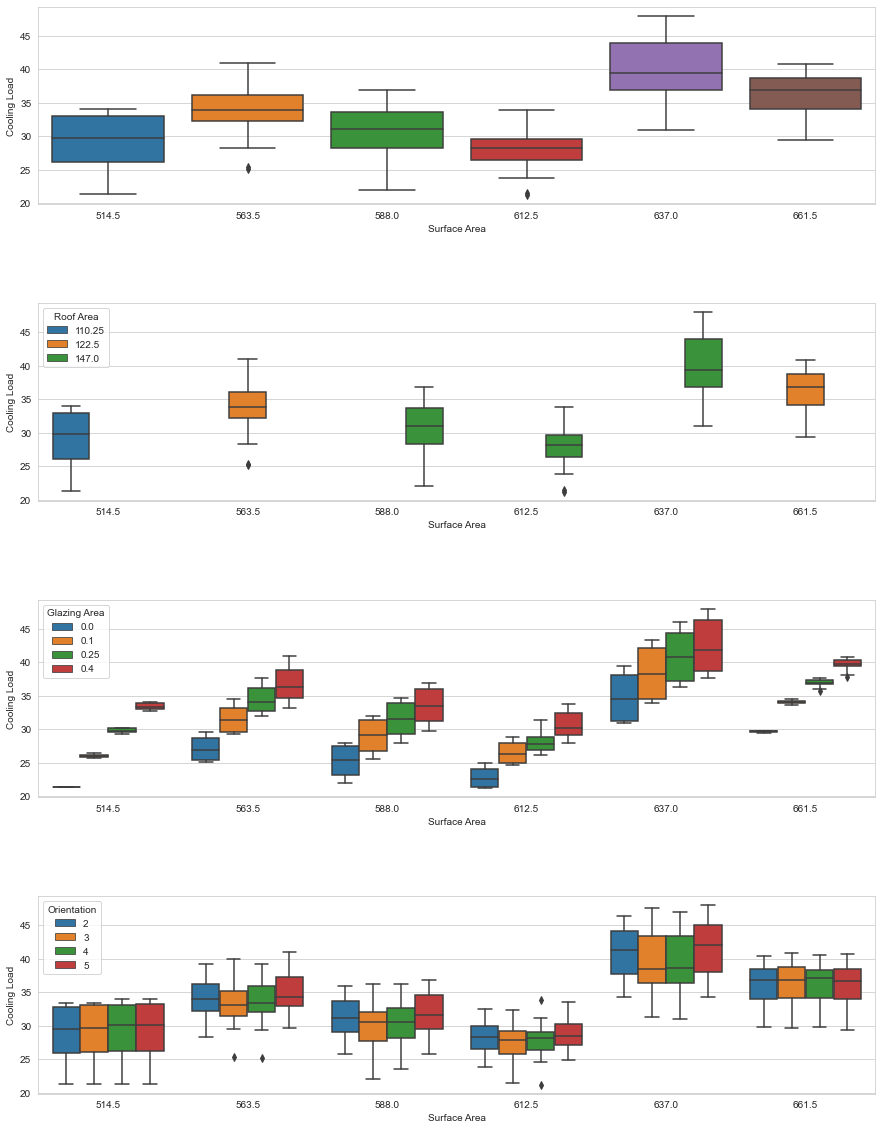

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
sns.boxplot(x="Surface Area",y="Cooling Load",data=df_7)


plt.subplot(4,1,2)
sns.boxplot(x="Surface Area",y="Cooling Load",data=df_7,hue="Roof Area")

plt.subplot(4,1,3)
sns.boxplot(x="Surface Area",y="Cooling Load",data=df_7,hue="Glazing Area")

plt.subplot(4,1,4)
sns.boxplot(x="Surface Area",y="Cooling Load",data=df_7,hue="Orientation")

plt.subplots_adjust(hspace=0.5)

#### Observation from the box plot for surface area:
- NO particular relation found with for SA v/s CL 
- Heigh GA increases the Load
- no role of orientation


# Effect of SA, RA and WA on CL

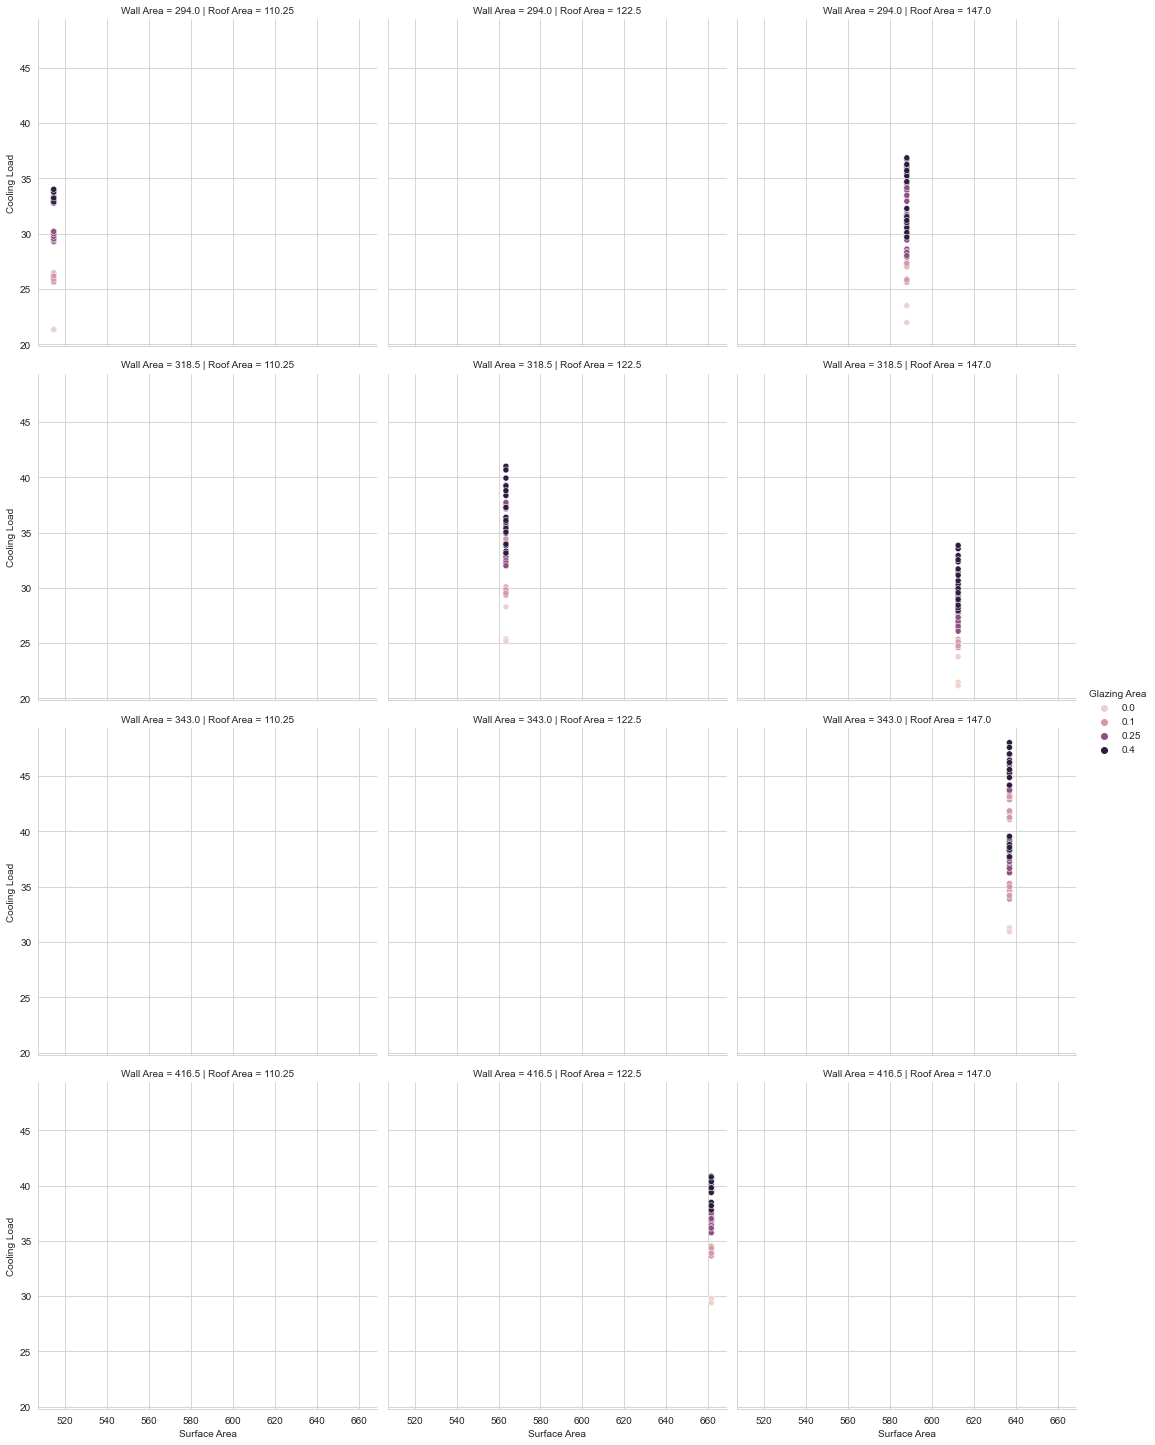

In [65]:
#understanding the 3D realtional of all the Areas with Cooling Load
sns.relplot(x="Surface Area",y="Cooling Load",data=df_7,row="Wall Area",col="Roof Area",hue="Glazing Area")

# Observation from SA/WA/RA v/s CL

- for low RA, low WA, low SA, CL is low upto 35, then CL increases to 37 with increase in RA and SA
- then WA increases, but SA decreases, still CL increases above 40. Then increase in SA leads to decrese in CL even after increase in RA
- Max CL (48) is found at  when WA(second heighest) = 343 at highest RA 
- Even at the highest SA=660 m2, and heightst WA, CL decreases as RA is reduced



# Wall area is playing a significant role in Cooling load irrespective of Surface Area. But it is related to Roof Area (Higher the wall area, higher the Cooling load).

# Conclusion:
- It is clearly evident that the Load efficiency is influenced by the Wall Area, Roof Area, Glazing Area.
When the Glazing Area is high, Roof Area is high and Wall Area is high, Load will be high and viceversa.